<a href="https://colab.research.google.com/github/Juanxtron/Proyecto-2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [3]:
import pandas as pd
#% pip install xlrd

# Especifica la ruta de tu archivo Excel
ruta_excel = '/content/drive/MyDrive/Copia de default of credit card clients.xls'

# Lee el archivo Excel en un DataFrame de pandas
datos_excel = pd.read_excel(ruta_excel, sheet_name="Data")

datos_excel.columns = datos_excel.iloc[0]

# Elimina la primera fila, ya que ahora son los nombres de las columnas
datos_excel = datos_excel[1:]


import pandas as pd

# Supongamos que 'df' es tu DataFrame
# df = pd.read_excel("ruta/a/tu/archivo.xlsx")

# Verifica si hay valores faltantes en cada columna
valores_faltantes_por_columna = datos_excel.isna().sum()

# También puedes usar df.isnull().sum() para el mismo propósito

import pandas as pd

# Supongamos que 'datos_excel' es tu DataFrame
# datos_excel = pd.read_excel("ruta/a/tu/archivo.xlsx")

# Eliminar filas con valores atípicos en la columna "EDUCATION"
datos_excel = datos_excel[datos_excel['EDUCATION'].isin([1, 2, 3, 4])]

# Eliminar filas con valores atípicos en la columna "MARRIAGE"
datos_excel = datos_excel[datos_excel['MARRIAGE'].isin([1, 2, 3])]

# Reindexar el DataFrame si es necesario
datos_excel.reset_index(drop=True, inplace=True)

# Cambiar el nombre de la columna "PAY_0" a "PAY_1"
datos_excel = datos_excel.rename(columns={"PAY_0": "PAY_1"})

# Convertir todas las columnas a tipos de datos numéricos
datos_excel = datos_excel.apply(pd.to_numeric, errors='coerce')


datos_excel.head()




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Importar las librerías necesarias
import tensorflow as tf
import numpy as np
from tensorflow import keras
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import EarlyStopping


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# split into X and Y
Y = datos_excel['default payment next month']
X = datos_excel.drop(['default payment next month'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

(29601, 24)
(29601,)


In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

# Escalar los datos (opcional, pero es común en redes neuronales)
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)


[[ 18062 150000      1      2      1     31      0      0     -1     -1
       0      0  64276  64226   4254 145578 148012 126848   3500   4508
  145578   5115  10000   7598]
 [ 12085  60000      1      1      2     27      0      0      0      0
       0      2  21387  22416  23444  26038  28607  27997   1378   1406
    3000   3000      0    923]
 [ 11593 260000      2      1      2     27     -1     -1     -1     -1
       0     -1    399    399    399    798    399    399    399    399
     798      0    399    399]]
[[ 0.35620325 -0.13554575 -1.23717033  0.25316363 -1.06975026 -0.48887123
   0.00830747  0.1028126  -0.69989757 -0.66575939  0.22336415  0.24280027
   0.1767551   0.21388414 -0.6142591   1.58598146  1.76754819  1.47967336
  -0.12992872 -0.06039584  7.80872378  0.01615083  0.34452676  0.14494164]
 [-0.33253274 -0.82883215 -1.23717033 -1.15450643  0.86120247 -0.92366825
   0.00830747  0.1028126   0.1281084   0.18348618  0.22336415  1.97100179
  -0.4066762  -0.37597319 -0.

In [14]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(24,)))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3713 (14.50 KB)
Trainable params: 3713 (14.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
hidden1 = model.layers[0]
hidden1.name

'dense'

In [9]:
weights, biases = hidden1.get_weights()
weights

array([[-1.05297968e-01,  2.12724030e-01, -7.30099529e-02,
        -1.36328414e-01, -3.17699015e-02, -2.53348351e-02,
        -9.77819562e-02,  2.11301148e-02, -2.50984371e-01,
         1.16739631e-01, -1.02909252e-01, -2.11066961e-01,
         5.79770207e-02, -1.60704032e-01, -5.05200773e-02,
        -1.12471700e-01,  2.33256102e-01,  2.80859590e-01,
        -6.85730875e-02,  4.19139862e-03, -2.61834830e-01,
        -2.26544797e-01, -2.06838384e-01,  2.96433687e-01,
        -1.87876940e-01,  2.11214960e-01,  2.82794237e-03,
        -6.60234690e-02,  1.97563052e-01,  9.58066285e-02,
         5.24219573e-02,  2.59135127e-01, -2.46748075e-01,
         1.15650475e-01, -3.20363045e-02,  2.60993361e-01,
        -1.32056847e-01,  1.76350057e-01, -1.92633554e-01,
         8.02133381e-02,  4.13395464e-02,  1.32241279e-01,
        -1.40539423e-01, -6.46588206e-03, -8.55799466e-02,
        -1.20112270e-01,  7.34046996e-02, -2.86771297e-01,
         1.81345850e-01,  2.75016785e-01,  2.63893306e-0

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000
592/592 [==============================] - 2s 3ms/step - loss: 0.4029 - accuracy: 0.8304 - val_loss: 0.4393 - val_accuracy: 0.8203
Epoch 2/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.4013 - accuracy: 0.8297 - val_loss: 0.4450 - val_accuracy: 0.8144
Epoch 3/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8320 - val_loss: 0.4475 - val_accuracy: 0.8104
Epoch 4/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8312 - val_loss: 0.4459 - val_accuracy: 0.8190
Epoch 5/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8318 - val_loss: 0.4420 - val_accuracy: 0.8180
Epoch 6/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8335 - val_loss: 0.4469 - val_accuracy: 0.8222
Epoch 7/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8335 - val_loss: 0.4460 - val_accuracy:

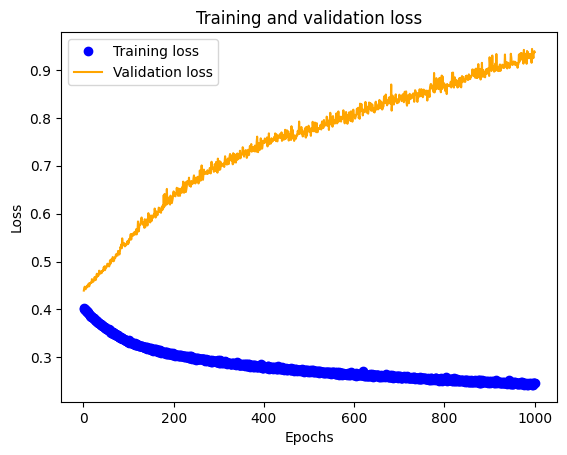

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1)

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

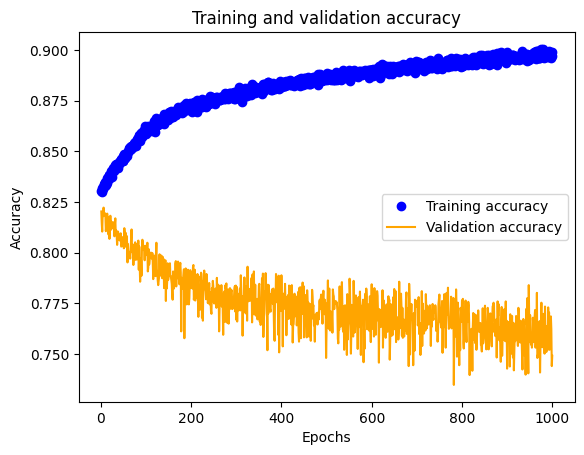

0.822212815284729

In [20]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1?
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(Y, preds))
##               precision    recall  f1-score   support
##
##            0       0.82      0.89      0.86       549
##            1       0.80      0.69      0.74       340
##
##     accuracy                           0.82       889
##    macro avg       0.81      0.79      0.80       889
## weighted avg       0.81      0.82      0.81       889

926/926 [==============================] - 2s 2ms/step
[[16016  6980]
 [ 4301  2304]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74     22996
           1       0.25      0.35      0.29      6605

    accuracy                           0.62     29601
   macro avg       0.52      0.52      0.51     29601
weighted avg       0.67      0.62      0.64     29601



In [23]:
# Guardar el modelo en Google Drive
model.save('/content/drive/My Drive/riesgo_credito.keras')